DATA VISUALZATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cdf = pd.read_csv("cleaned_who_suicide_statistics_csv.csv")

In [3]:
cdf

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,05-14,0.0,311000.0
1,Albania,1987,female,15-24,14.0,289700.0
2,Albania,1987,female,25-34,4.0,257200.0
3,Albania,1987,female,35-54,6.0,278800.0
4,Albania,1987,female,55-74,0.0,144600.0
...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,15-24,0.0,6933.0
36056,Virgin Islands (USA),2015,male,25-34,2.0,4609.0
36057,Virgin Islands (USA),2015,male,35-54,1.0,12516.0
36058,Virgin Islands (USA),2015,male,55-74,0.0,12615.0


# GRAPH 1 - LINE GRAPH SHOWS TRENDS OF SUICIDES THROUGH YEARS

In [4]:
#Line graph shows trends of suicides through years
y_cdf = cdf[["year","suicides_no","population"]].groupby(["year"]).sum()
y_cdf["suicides per 100000"] = (y_cdf["suicides_no"]/y_cdf["population"])*100000
y_cdf.head()

,suicides_no,population,suicides per 100000
year,,,
1979,92790.0,8.225891e+08,11.280237
1980,153400.0,1.086858e+09,14.114080
1981,177705.0,1.179065e+09,15.071691
1982,182435.0,1.186361e+09,15.377702
1983,122166.0,9.901033e+08,12.338712


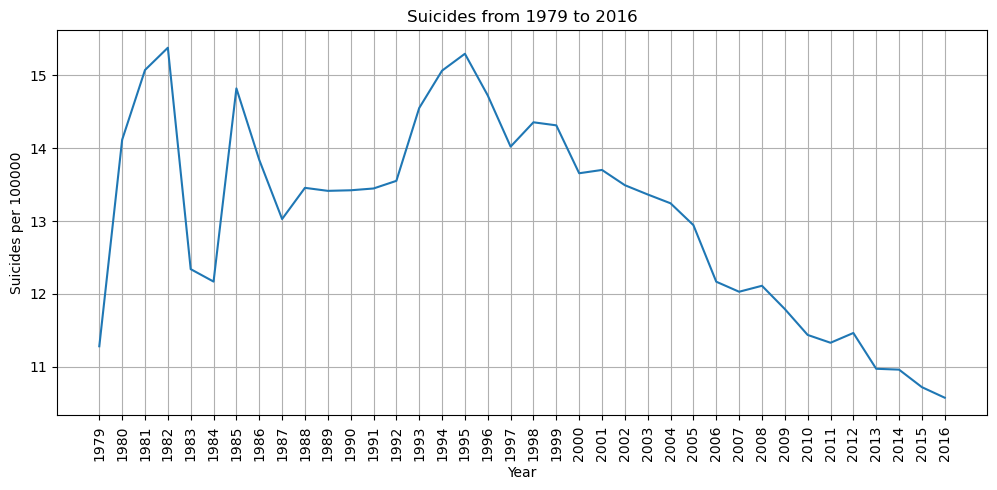

In [5]:
plt.figure(figsize=(12,5))

plt.plot(y_cdf.index, y_cdf["suicides per 100000"])
plt.xticks(y_cdf.index, rotation=90)
plt.grid()
plt.title("Suicides from 1979 to 2016")
plt.xlabel("Year")
plt.ylabel("Suicides per 100000")

plt.show()

# GRAPH 2 - BAR GRAPH SHOWS TOP 5 COUNTRIES WITH HIGHEST SUICIDE RATE

In [6]:
#show top 5 countries with highest average suicide rate
c_cdf = cdf[["country", "suicides_no", "population"]].groupby(["country"]).sum()
c_cdf["suicides per 100000"] = (c_cdf["suicides_no"]/c_cdf["population"])*100000
top5_cdf = c_cdf.sort_values(by="suicides per 100000",ascending=False).head(5)
top5_cdf

,suicides_no,population,suicides per 100000
country,,,
Lithuania,42166.0,1.084217e+08,38.890734
Hungary,130018.0,3.687719e+08,35.257028
Russian Federation,1500992.0,4.607764e+09,32.575279
Sri Lanka,80747.0,2.488106e+08,32.453196
Latvia,24861.0,8.093534e+07,30.717113


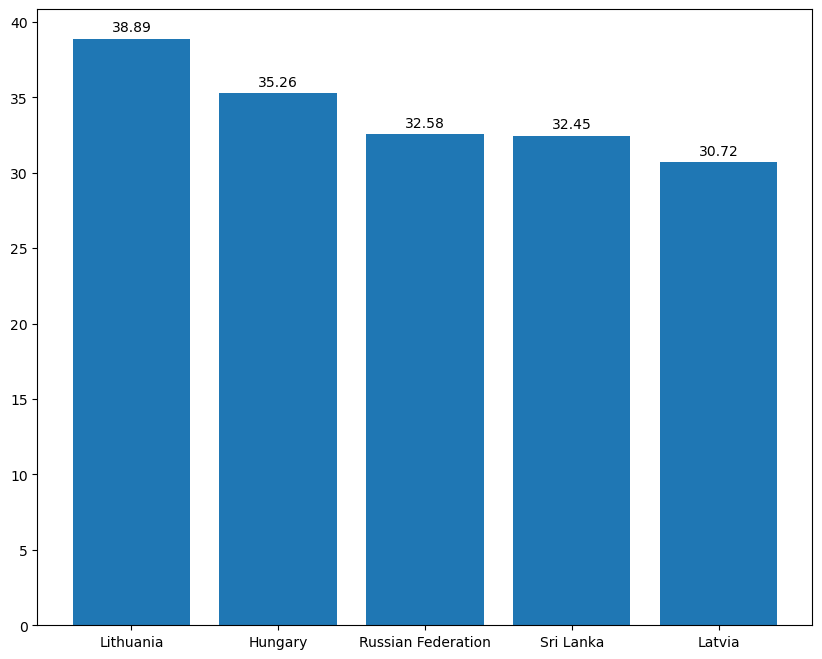

In [7]:
plt.figure(figsize=(10,8))
plt.bar(top5_cdf.index, top5_cdf["suicides per 100000"])
for x,y in zip(top5_cdf.index, top5_cdf["suicides per 100000"]):
    label = "{:.2f}".format(y) #format y to 2 decimal points
    plt.annotate(label, 
                 (x,y),                           #coordinates to position the label
                 textcoords="offset points",      #how to position the label
                 xytext=(0,5),                    #distance from label to (x,y)
                 ha="center")                     #how to align the label

plt.show()

# GRAPH 3 - PIE CHART SHOWS SUICIDE RATES IN EACH AGE GROUP

In [8]:
#Bar chart showing suicides by each age group
a_cdf = cdf[["age","suicides_no","population"]].groupby(["age"]).sum()
a_cdf["suicides per 100000"] = (a_cdf["suicides_no"]/a_cdf["population"])*100000
a_cdf

,suicides_no,population,suicides per 100000
age,,,
05-14,62320.0,1.045102e+10,0.596306
15-24,975700.0,1.058785e+10,9.215279
25-34,1360780.0,1.018079e+10,13.366147
35-54,2887740.0,1.682287e+10,17.165563
55-74,1955150.0,1.025017e+10,19.074323
75+,756777.0,3.009149e+09,25.149206


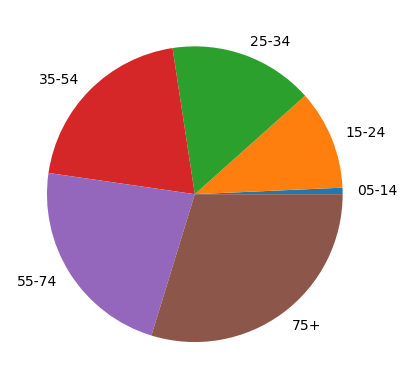

In [9]:
plt.clf()
plt.pie(a_cdf["suicides per 100000"], labels=a_cdf.index)
plt.show()

# GRAPH 4 - STACKED AREA PLOTS SHOWS SUICIDE RATES IN MALE AND FEMALE THROUGH YEARS

In [10]:
#suicide rates in male and female through years
female_cdf = cdf[["year","suicides_no"]].loc[cdf["sex"]=="female"].groupby("year").sum().sort_values("year")
male_cdf = cdf[["year","suicides_no"]].loc[cdf["sex"]=="male"].groupby("year").sum().sort_values("year")


sex_cdf = cdf[["year","age","population"]].groupby("year").sum().sort_values("year")
sex_cdf["female suicides_no"] = female_cdf
sex_cdf["male suicides_no"] = male_cdf
sex_cdf["female suicides per 100000"] = (sex_cdf["female suicides_no"]/sex_cdf["population"])*100000
sex_cdf["male suicides per 100000"] = (sex_cdf["male suicides_no"]/sex_cdf["population"])*100000

sex_cdf.head()

,population,female suicides_no,male suicides_no,female suicides per 100000,male suicides per 100000
year,,,,,
1979,8.225891e+08,29418.0,63372.0,3.576269,7.703968
1980,1.086858e+09,42629.0,110771.0,3.922224,10.191856
1981,1.179065e+09,47448.0,130257.0,4.024206,11.047485
1982,1.186361e+09,47564.0,134871.0,4.009236,11.368465
1983,9.901033e+08,34759.0,87407.0,3.510644,8.828068


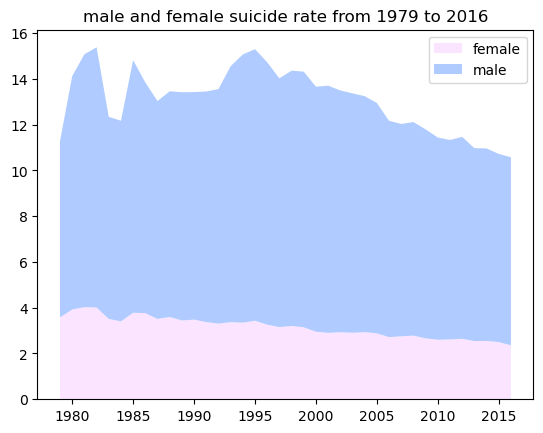

In [11]:
plt.clf()
pal = ["fbe4ff","afcbff"]
plt.stackplot(sex_cdf.index, sex_cdf["female suicides per 100000"], sex_cdf["male suicides per 100000"], labels=["female","male"], colors=pal)
plt.legend()
plt.title("male and female suicide rate from 1979 to 2016")
plt.show()